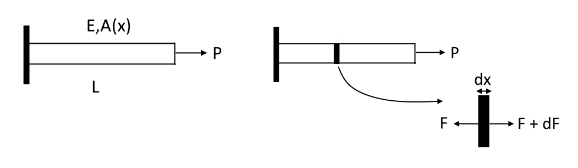



$$
\frac{\partial }{\partial x} \left[ EA \frac{\partial u}{\partial x} \right] = 0
$$

$$
u(0) = 0 
$$

$$
EA(L) \frac{\partial u}{\partial x} \bigg\rvert_{L} = P
$$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x')
u1 = sp.Function('u1')(x)
L = sp.symbols('L')
E = sp.symbols('E')
P = sp.symbols('P')
A0 = sp.symbols('A0')
A = A0 * (1-x/(2*L))

diffeq = sp.diff(E*A*sp.diff(u1,x),x)
ic1 = u1.subs(x,0)
ic2 = sp.diff(u1,x).subs(x,L)
sol = sp.dsolve(diffeq, ics={ic1: 0,ic2:P/(E*A.subs(x,L))})
sol

Eq(u1(x), 2*L*P*log(-L)/(A0*E) - 2*L*P*log(-2*L + x)/(A0*E) + 2*L*P*log(2)/(A0*E))

In [3]:
sol_rhs = sol.rhs

In [4]:
u_analytic = sol_rhs.subs({x:1,L:1,P:1,E:1,A0:1})
u_analytic

2*log(2)

In [5]:
sp.N(u_analytic)

1.38629436111989

In [6]:
consts = dict()
def u(n):
    temp = 0
    for i in range(n+1):
        consts[f'c{i}'] = sp.symbols(f'c{i}')
        temp += consts[f'c{i}']*x**i
    return temp    

uh = u(1) 
uh

c0 + c1*x

In [7]:
c0 = sp.solve(uh.subs(x,0),consts['c0'])[0]
c0

0

In [8]:
uh = uh.subs(consts['c0'],c0)
uh

c1*x

In [9]:
I = sp.integrate(E*A/2*uh.diff(x)**2,(x,0,L))-P*uh
I

3*A0*E*L*c1**2/8 - P*c1*x

In [10]:
sol2 = sp.solve(I.diff(consts['c1']),consts['c1'])[0]
sol2

4*P*x/(3*A0*E*L)

In [11]:
u_app = uh.subs(consts['c1'],sol2)
u_app

4*P*x**2/(3*A0*E*L)

In [12]:
u_bir = u_app.subs(x,L).subs({L:1,A0:1,E:1,P:1})
sp.N(u_bir)

1.33333333333333

In [13]:
consts = dict()
def u(n):
    temp = 0
    for i in range(n+1):
        consts[f'c{i}'] = sp.symbols(f'c{i}')
        temp += consts[f'c{i}']*x**i
    return temp    

uh = u(2) 
uh

c0 + c1*x + c2*x**2

In [14]:
c0 = sp.solve(uh.subs(x,0),consts['c0'])[0]
c0

0

In [15]:
uh = uh.subs(consts['c0'],c0)
uh

c1*x + c2*x**2

In [16]:
I = sp.integrate(E*A/2*uh.diff(x)**2,(x,0,L))-P*uh
I

-A0*E*L**3*c2**2/4 + A0*E*L*c1**2/2 + L**2*(2*A0*E*L*c2**2 - A0*E*c1*c2)/3 + L*(8*A0*E*L*c1*c2 - A0*E*c1**2)/8 - P*(c1*x + c2*x**2)

In [17]:
sol2 = sp.solve((I.diff(consts['c1']),I.diff(consts['c2'])),consts['c1'],consts['c2'])
sol2

{c1: (60*L*P*x - 48*P*x**2)/(13*A0*E*L**2),
 c2: (-48*L*P*x + 54*P*x**2)/(13*A0*E*L**3)}

In [18]:
u_app = uh.subs(sol2)
u_app

x*(60*L*P*x - 48*P*x**2)/(13*A0*E*L**2) + x**2*(-48*L*P*x + 54*P*x**2)/(13*A0*E*L**3)

In [19]:
u_iki = u_app.subs(x,L).subs({L:1,A0:1,E:1,P:1})
sp.N(u_iki)

1.38461538461538

In [20]:
fark1 = sp.N(u_analytic) - sp.N(u_bir)
fark2 = sp.N(u_analytic) - sp.N(u_iki)
print(f"fark1 : {fark1}")
print(f"fark2 : {fark2}")

fark1 : 0.0529610277865573
fark2 : 0.00167897650450599
